# 📊 Social Media Engagement Analysis
**Tools Used**: Python, Pandas, SQLite, Matplotlib, Seaborn, Scikit-learn, Statsmodels  
**Goal**: Analyze social media performance metrics across different platforms and content types to extract data-driven insights.

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
import statsmodels.api as sm

sns.set(style="whitegrid")

In [9]:
# Load & Setup the dataset
df = pd.read_csv("social_media_engagement.csv")
df['post_time'] = pd.to_datetime(df['post_time'])
df['hour'] = df['post_time'].dt.hour
df['month'] = df['post_time'].dt.month
df['day'] = df['post_time'].dt.day
df['weekday'] = df['post_time'].dt.day_name()
df['engagement'] = df['likes'] + df['comments'] + df['shares']

# Convert to categorical
for col in ['platform', 'post_type', 'post_day', 'sentiment_score']:
    df[col] = df[col].astype('category')

df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,hour,month,day,weekday,engagement
0,1,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,14,8,17,Thursday,3223
1,2,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,0,5,14,Sunday,4786
2,3,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,16,2,21,Tuesday,6051
3,4,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,0,11,16,Thursday,1460
4,5,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,0,5,23,Tuesday,4032


In [29]:
# Using SQL for Analysis
conn = sqlite3.connect(":memory:")
df.to_sql("posts", conn, index=False, if_exists="replace")

# Average engagement by platform
result1 = pd.read_sqlplatform_stats = pd.read_sql("""
    SELECT platform, COUNT(*) AS post_count,
           AVG(likes) AS avg_likes,
           AVG(comments) AS avg_comments,
           AVG(shares) AS avg_shares,
           AVG(likes + comments + shares) AS avg_engagement
    FROM posts GROUP BY platform ORDER BY avg_engagement DESC
""", conn)

# Average engagement by platform and post type
result2 = pd.read_sqlpost_type_stats = pd.read_sql("""
    SELECT platform, post_type,
           AVG(likes + comments + shares) AS avg_engagement
    FROM posts GROUP BY platform, post_type ORDER BY avg_engagement DESC
""", conn)

# Average engagement by sentiment
result3 = pd.read_sqlsentiment_stats = pd.read_sql("""
    SELECT sentiment_score,
           COUNT(*) as total,
           AVG(likes + comments + shares) AS avg_engagement
    FROM posts GROUP BY sentiment_score ORDER BY avg_engagement DESC
""", conn)
print(result1, result2, result3)

    platform  post_count    avg_likes  avg_comments  avg_shares  \
0  Instagram          36  2999.833333    232.444444  525.166667   
1   Facebook          32  2699.750000    248.906250  474.375000   
2    Twitter          32  1368.593750    122.906250  233.718750   

   avg_engagement  
0     3757.444444  
1     3423.031250  
2     1725.218750        platform post_type  avg_engagement
0    Facebook      poll     4985.333333
1   Instagram     video     4862.285714
2   Instagram      poll     4325.166667
3   Instagram     image     4160.000000
4    Facebook     video     4092.444444
5   Instagram  carousel     3316.777778
6    Facebook  carousel     3158.000000
7    Facebook      text     3117.166667
8     Twitter  carousel     2481.142857
9   Instagram      text     2330.000000
10    Twitter      poll     1949.000000
11   Facebook     image     1866.500000
12    Twitter     video     1516.571429
13    Twitter      text     1473.500000
14    Twitter     image     1273.166667   sentiment

#### Visualizations:

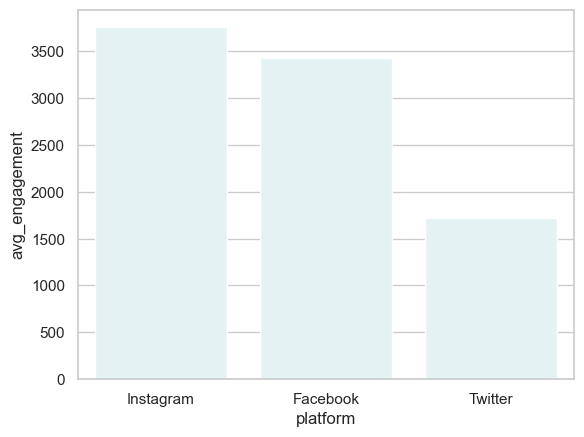

In [71]:
# 1. Average Engagement by Platform
sns.barplot(data=platform_stats, x="platform", y="avg_engagement")
sns.set_palette("BuGn")

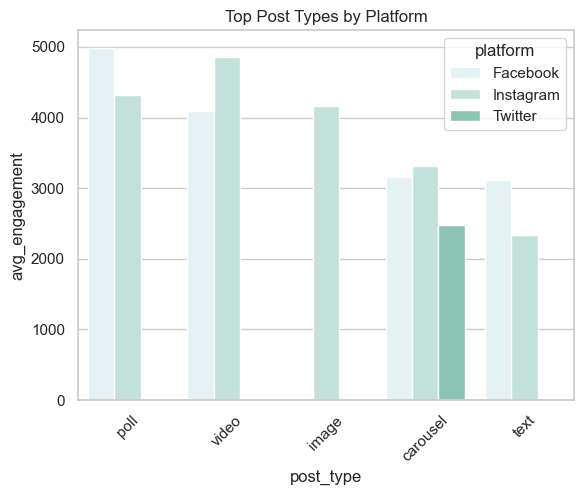

In [73]:
# 2. Top Post Types by Platform
top10 = post_type_stats.head(10)
sns.barplot(data=top10, x="post_type", y="avg_engagement", hue="platform")
sns.set_palette("Set3")
plt.title("Top Post Types by Platform")
plt.xticks(rotation=45)
plt.show()

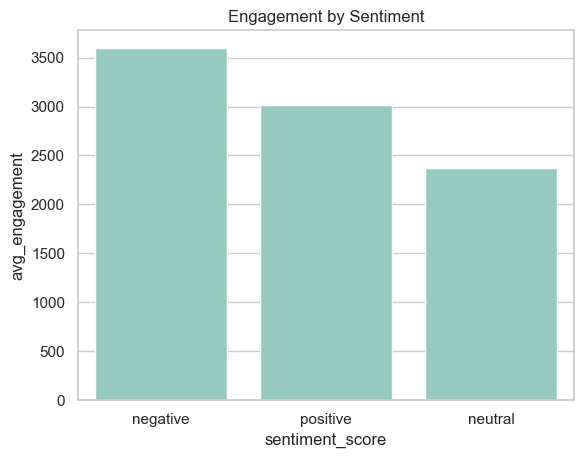

In [75]:
# 3. Engagement by Sentiment
sns.barplot(data=sentiment_stats, x="sentiment_score", y="avg_engagement")
sns.set_palette("Greens")
plt.title("Engagement by Sentiment")
plt.show()

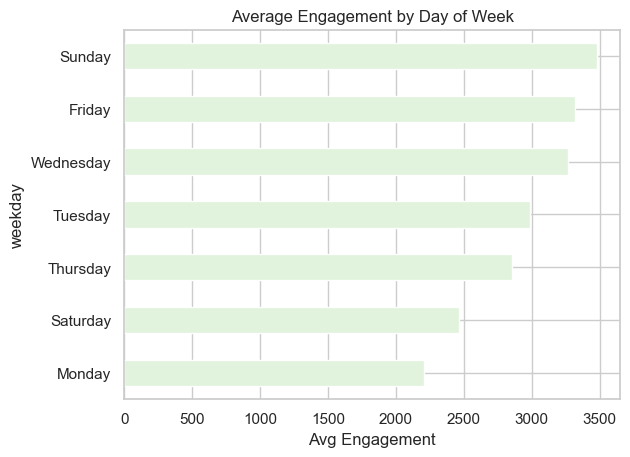

In [77]:
# 4. Engagement by Day of Week
df.groupby("weekday")['engagement'].mean().sort_values().plot(kind="barh")
plt.title("Average Engagement by Day of Week")
plt.xlabel("Avg Engagement")
plt.show()

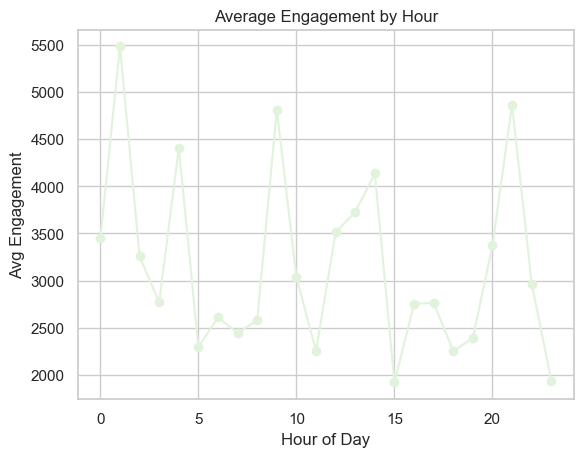

In [81]:
# 5. Engagement by Hour
df.groupby("hour")['engagement'].mean().plot(kind="line", marker='o')
plt.title("Average Engagement by Hour")
plt.ylabel("Avg Engagement")
plt.xlabel("Hour of Day")
plt.grid(True)
plt.show()

In [83]:
# ANOVA Statistical Testing
f_stat, p_val = f_oneway(
    df[df.platform == "Facebook"]['engagement'],
    df[df.platform == "Instagram"]['engagement'],
    df[df.platform == "Twitter"]['engagement']
)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 16.31, p-value: 0.0000


In [86]:
# Regression Analysis
df_enc = df.copy()
le = LabelEncoder()
df_enc['platform_enc'] = le.fit_transform(df_enc['platform'])
df_enc['sentiment_enc'] = le.fit_transform(df_enc['sentiment_score'])

# OLS Regression: engagement explained by platform, sentiment, hour
model = ols('engagement ~ C(platform_enc) + C(sentiment_enc) + hour', data=df_enc).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             engagement   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     8.936
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           5.68e-07
Time:                        17:42:50   Log-Likelihood:                -870.02
No. Observations:                 100   AIC:                             1752.
Df Residuals:                      94   BIC:                             1768.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4009.68